In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle

# Load the data
df = pd.read_csv("all_infos_processed.csv")

# Using dictionnaries to map string values to numbers (starting from 1)
df = df.replace(
    {
        "Type_of_property": {
            "APARTMENT": 1,
            "APARTMENT_GROUP": 2,
            "HOUSE": 3,
            "HOUSE_GROUP": 4,
        }
    }
)
df = df.replace(
    {
        "Subtype_of_property": {
            "PENTHOUSE": 1,
            "APARTMENT": 2,
            "DUPLEX": 3,
            "GROUND_FLOOR": 4,
            "FLAT_STUDIO": 5,
            "LOFT": 6,
            "TRIPLEX": 7,
            "SERVICE_FLAT": 8,
            "APARTMENT_GROUP": 9,
            "KOT": 10,
            "HOUSE": 11,
            "HOUSE_GROUP": 12,
            "APARTMENT_BLOCK": 13,
            "VILLA": 14,
            "MANSION": 15,
            "MIXED_USE_BUILDING": 16,
            "EXCEPTIONAL_PROPERTY": 17,
            "COUNTRY_COTTAGE": 18,
            "BUNGALOW": 19,
            "TOWN_HOUSE": 20,
            "FARMHOUSE": 21,
            "CHALET": 22,
            "CASTLE": 23,
            "OTHER_PROPERTY": 24,
            "MANOR_HOUSE": 25,
        }
    }
)
df = df.replace(
    {
        "Type_of_sale": {
            "residential_sale": 1,
            "group_sale": 2,
            "first_session_with_reserve_price": 3,
            "annuity_monthly_amount": 4,
            "annuity_without_lump_sum": 5,
        }
    }
)
df = df.replace(
    {
        "Fully_equipped_kitchen": {
            "NOT_INSTALLED": 0,
            "USA_HYPER_EQUIPPED": 1,
            "INSTALLED": 2,
            "HYPER_EQUIPPED": 3,
            "SEMI_EQUIPPED": 4,
            "USA_INSTALLED": 5,
            "USA_SEMI_EQUIPPED": 6,
            "USA_UNINSTALLED": 7,
        }
    }
)
df = df.replace({"Furnished": {False: 0, True: 1}})
df = df.replace({"Open_fire": {False: 0, True: 1}})
df = df.replace({"Terrace": {False: 0, True: 1}})
df = df.replace({"Garden": {False: 0, True: 1}})
df = df.replace({"Swimming_pool": {False: 0, True: 1}})
df = df.replace(
    {
        "State_of_the_building": {
            "AS_NEW": 1,
            "JUST_RENOVATED": 2,
            "TO_RESTORE": 3,
            "GOOD": 4,
            "TO_RENOVATE": 5,
            "TO_BE_DONE_UP": 6,
        }
    }
)

# Drop rows where the target (Price) is missing
df = df.dropna(subset=["Price"])

# Fill remaining NaN with 0
df = df.fillna(0)

# Use boolean indexing to select only the rows that meet this price range (outliers removal)
df = df[(df["Price"] > 10000) & (df["Price"] < 5000000)]  # 10k to 5M
# df = df[(df['Price'] > 100000) & (df['Price'] < 5000000)] #100k to 5M
# df = df[(df['Price'] > 100000) & (df['Price'] < 5000000)] #2M to 5M

# Selecting columns for the features
# X = df.drop(columns=["Price"])
X = df[
    [
        "Living_Area",
        "Locality",
        "Surface_area_of_the_plot_of_land",
        "Number_of_rooms",
        "Type_of_property",
        "Subtype_of_property",
        "State_of_the_building",
        "Terrace_Area",
        "Garden_Area",
        "Fully_equipped_kitchen",
        "Swimming_pool",
        "Number_of_facades",
    ]
]

# Selecting the 'Price' column as the target
y = df["Price"]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

df

,Unnamed: 0.1,Locality,Type_of_property,Subtype_of_property,Price,Type_of_sale,Number_of_rooms,Living_Area,Fully_equipped_kitchen,Furnished,Open_fire,Terrace,Terrace_Area,Garden,Garden_Area,Surface_area_of_the_plot_of_land,Number_of_facades,Swimming_pool,State_of_the_building,Unnamed: 0
0,0,1130,1,1,450000.0,1,3.0,156.0,1.0,0.0,0,1.0,43.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
1,1,1140,1,1,450000.0,1,3.0,156.0,1.0,0.0,0,1.0,43.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0
2,2,1140,1,1,450000.0,1,3.0,156.0,1.0,0.0,0,1.0,43.0,0.0,0.0,0.0,4.0,0.0,0.0,2.0
3,3,1180,1,2,485000.0,1,2.0,107.0,1.0,0.0,0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
4,4,1000,1,3,460000.0,1,3.0,147.0,1.0,0.0,0,1.0,52.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,18,1150,3,14,1450000.0,1,5.0,460.0,0.0,0.0,0,1.0,55.0,1.0,300.0,792.0,4.0,0.0,4.0,18.0
19368,19,7000,3,14,1495000.0,1,7.0,500.0,3.0,0.0,1,1.0,200.0,1.0,10200.0,10550.0,4.0,1.0,1.0,19.0
19369,20,8480,3,14,1595000.0,1,4.0,537.0,2.0,0.0,0,1.0,0.0,1.0,0.0,14376.0,4.0,0.0,4.0,20.0
19370,21,1640,3,14,1735000.0,1,6.0,450.0,2.0,0.0,1,1.0,30.0,0.0,0.0,2285.0,4.0,0.0,4.0,21.0


R2:  0.8472080169200318
MAPE: 23.24%
MAE:  96677.79504642832
MSE:  38665991200.77137
RMSE:  196636.6985096408


<function matplotlib.pyplot.show(close=None, block=None)>

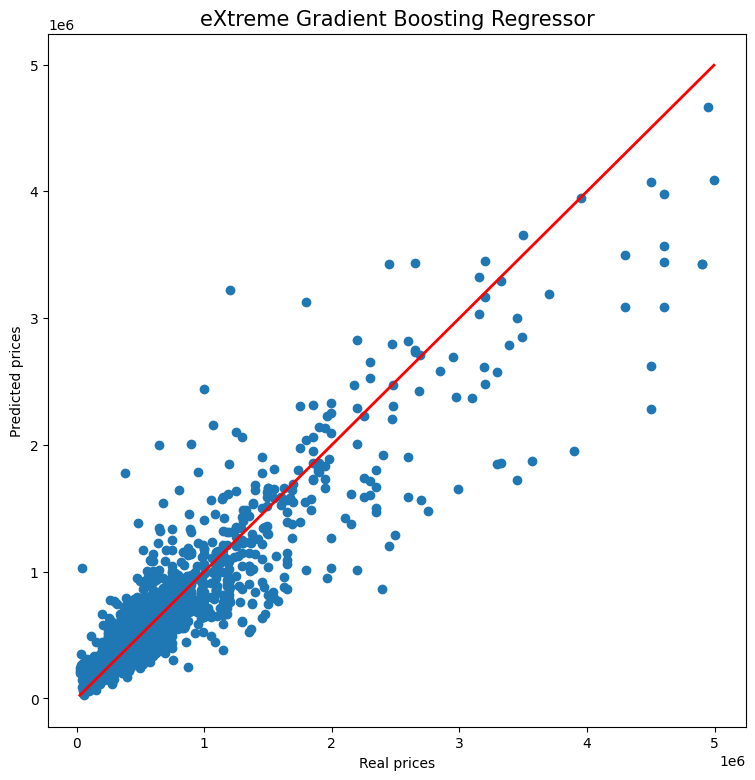

In [7]:
# eXtreme Gradient Boost
import xgboost as xgb

# Initializing the xgboost model
xgb_model = xgb.XGBRegressor(
    learning_rate=0.07,
    max_depth=7,
    min_child_weight=4,
    n_estimators=500,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_lambda=2.4712419216872974e-06,
    reg_alpha=1.7856024481811375e-06,
)

# Fitting the model to the training data
xgb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_model.predict(X_test)

# Save the model in txt format
xgb_model.save_model("xgboost_model.txt")

# save the model to a pickle file
with open("xgboost_model.pickle", "wb") as file:
    pickle.dump(xgb_model, file)

# Calculate the absolute percentage difference between the predictions and the true values (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Score
print("R2: ", xgb_model.score(X_test, y_test))
print("MAPE: {:.2f}%".format(mape))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot
fig = plt.subplots(figsize=(9, 9))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r", lw=2)
plt.xlabel("Real prices", size=10)
plt.ylabel("Predicted prices", size=10)
plt.title("eXtreme Gradient Boosting Regressor", size=15)
plt.savefig("./visuals/eXtreme_Gradient_Boosting.png")
plt.show

R2: 0.8395478640608349
MAPE: 22.71%
MAE:  95337.52295417835
MSE:  40604492142.24583
RMSE:  201505.56355159485


<function matplotlib.pyplot.show(close=None, block=None)>

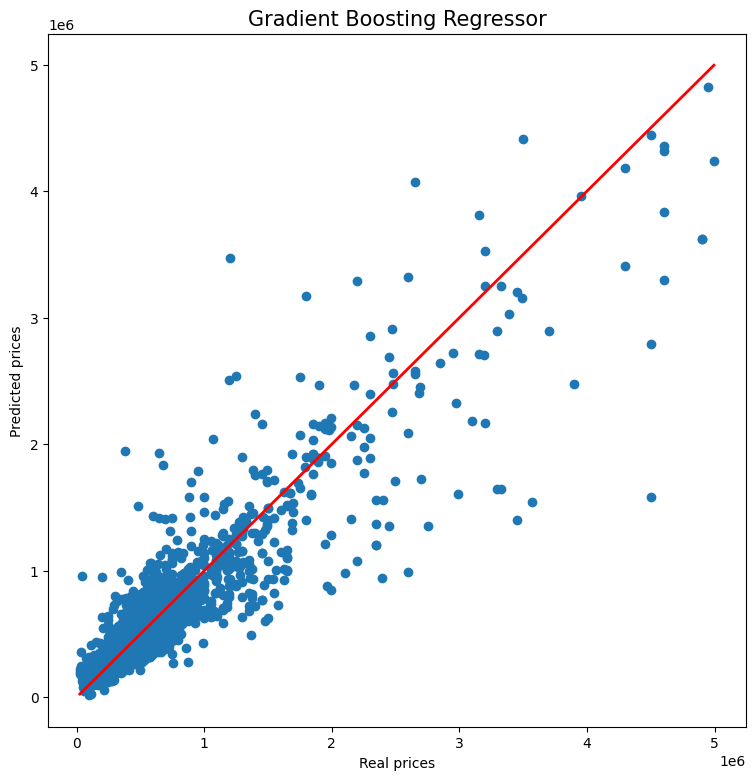

In [8]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Train the model
gbr = GradientBoostingRegressor(
    n_estimators=500,
    max_depth=7,
    min_samples_split=2,
    learning_rate=0.1,
    loss="squared_error",
)

gbr.fit(X_train, y_train)

pred = gbr.predict(X_test)

# Calculate the absolute percentage difference between the predictions and the true values (MAPE)
mape = np.mean(np.abs((y_test - pred) / y_test)) * 100

# Score
GBRscore = gbr.score(X_test, y_test)
print("R2:", GBRscore)
print("MAPE: {:.2f}%".format(mape))
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))

# Plot
fig = plt.subplots(figsize=(9, 9))
plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r", lw=2)
plt.xlabel("Real prices", size=10)
plt.ylabel("Predicted prices", size=10)
plt.title("Gradient Boosting Regressor", size=15)
plt.savefig("./visuals/Gradient_Boosting.png")
plt.show

R2: 0.8175821057328142
MAPE: 24.92%
MAE:  102209.27094796443
MSE:  46163211920.004074
RMSE:  214856.25874059167


<function matplotlib.pyplot.show(close=None, block=None)>

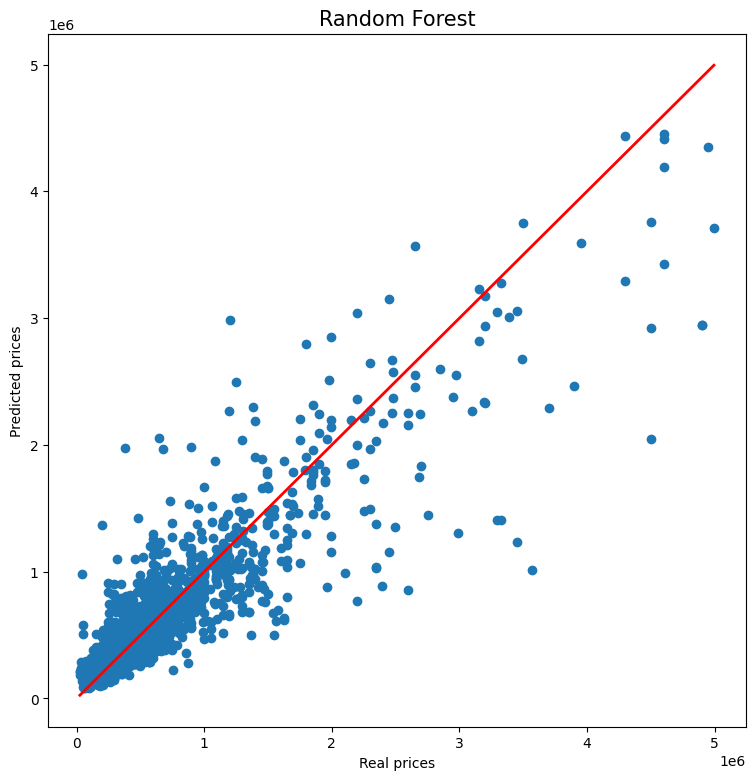

In [9]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_regressor = RandomForestRegressor(n_estimators=40, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_pred = rf_regressor.predict(X_test)

# Calculate the absolute percentage difference between the predictions and the true values (MAPE)
mape = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100

# Score
rf_score = rf_regressor.score(X_test, y_test)
print("R2:", rf_score)
print("MAPE: {:.2f}%".format(mape))
print("MAE: ", mean_absolute_error(y_test, rf_pred))
print("MSE: ", mean_squared_error(y_test, rf_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, rf_pred)))

# Plot
fig = plt.subplots(figsize=(9, 9))
plt.scatter(y_test, rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r", lw=2)
plt.xlabel("Real prices", size=10)
plt.ylabel("Predicted prices", size=10)
plt.title("Random Forest", size=15)
plt.savefig("./visuals/Random_Forest.png")
plt.show

[LightGBM] [Warning] feature_fraction is set=0.991754841975438, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.991754841975438
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] lambda_l1 is set=2.6916222634286717e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6916222634286717e-07
[LightGBM] [Warning] bagging_fraction is set=0.9635281141781349, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9635281141781349
[LightGBM] [Warning] lambda_l2 is set=2.00132355372712e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.00132355372712e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
R2:  0.8087387709458291
MAPE: 23.67%
MAE:  99088.14948595662
MSE:  48401132380.006714
RMSE:  220002.5735758714


<function matplotlib.pyplot.show(close=None, block=None)>

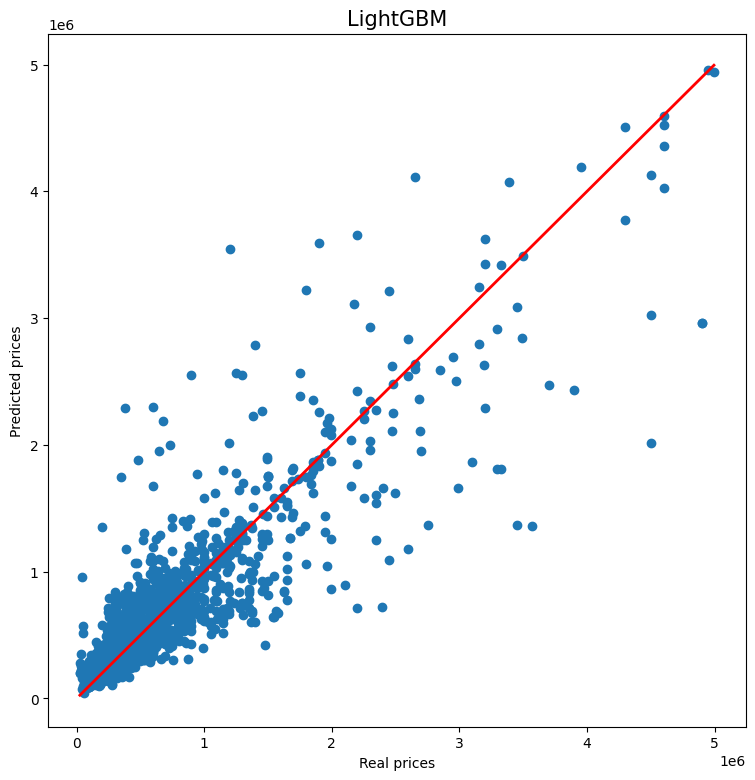

In [10]:
import lightgbm as lgb

# Create the LightGBM model
lgb_model = lgb.LGBMRegressor(
    objective="regression",
    num_leaves=803,
    learning_rate=0.1,
    feature_fraction=0.991754841975438,
    bagging_fraction=0.9635281141781349,
    min_data_in_leaf=3,
    lambda_l1=2.6916222634286717e-07,
    lambda_l2=2.00132355372712e-08,
    bagging_freq=7,
    extra_trees=False,
    feature_pre_filter=False,
)

# Fit the model to the training data
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
lgb_pred = lgb_model.predict(X_test)

# Calculate the absolute percentage difference between the predictions and the true values (MAPE)
mape = np.mean(np.abs((y_test - lgb_pred) / y_test)) * 100

# Evaluate the model accuracy
score = lgb_model.score(X_test, y_test)
print("R2: ", score)
print("MAPE: {:.2f}%".format(mape))
print("MAE: ", mean_absolute_error(y_test, lgb_pred))
print("MSE: ", mean_squared_error(y_test, lgb_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, lgb_pred)))

# Plot
fig = plt.subplots(figsize=(9, 9))
plt.scatter(y_test, lgb_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r", lw=2)
plt.xlabel("Real prices", size=10)
plt.ylabel("Predicted prices", size=10)
plt.title("LightGBM", size=15)
plt.savefig("./visuals/LightGBM.png")
plt.show